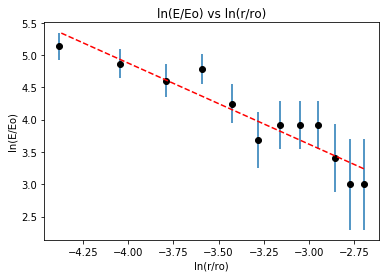

n was calculated from the slope of the log-log plot to be 1.25


In [2]:
%matplotlib inline
# Sam Schonsberg
# PHSX 218
# Electric Fields and Electric Potential Lab
# 2/13/2019


import numpy as np
from matplotlib import pyplot as plt


# Entering Variables
r_mid = np.flip(np.array([.0125, .0175, .0225, .0275, .0325, .0375, .0425, .0475, .0525,
                  .0575, .0625, .0675]),0) # in meters

radii = np.array([.07,.065,.06,.055,.05,.045,.04,.035,.03,.025,.02,.015,.01])

# readings from Channel 1
volt1 = np.flip(np.array([4.4, 5.1, 5.7, 6.2, 6.8, 7.2, 7.5, 7.7, 7.9, 8.2, 8.3, 8.4, 8.5]),0)
# readings from Channel 3 ( Channel 2 was bad )
volt2 = np.flip(np.array([4.1, 5.1, 5.8, 6.3, 6.9, 7.2, 7.3, 7.6, 7.9, 8.1, 8.3, 8.4, 8.5]),0)

volt_avg = (volt1+volt2)/2



# Calculating the E field / log(E) / uncertainties
fields = np.zeros([12])

for i in np.arange(12):
    E = (volt_avg[i+1]-volt_avg[i]) / (radii[i+1]-radii[i])
    fields[i] = E

unc_fields = np.zeros([12])

for i in np.arange(12):
    unc = fields[i]*np.sqrt((0.1 / (volt_avg[i+1]-volt_avg[i]))**2 + (.1/.5)**2)
    unc_fields[i] = unc

log_E = np.log(fields)

unc_log_E = np.log(fields + unc_fields) - np.log(fields)


# Making the plot and calculating n using np.polyfit degree 1

plt.plot(np.log(r_mid), log_E,'ko')
plt.errorbar(np.log(r_mid), log_E, unc_log_E, linestyle='')
plt.xlabel('ln(r/ro)')
plt.ylabel('ln(E/Eo)')
plt.title('ln(E/Eo) vs ln(r/ro)')

polys = np.polyfit(np.log(r_mid),log_E,1)

n = -polys[0]

plt.plot(np.log(r_mid),polys[0]*np.log(r_mid)+polys[1],'r--')
plt.show()

print 'n was calculated from the slope of the log-log plot to be', round(n,2)
